In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
tf.__version__

'2.17.0'

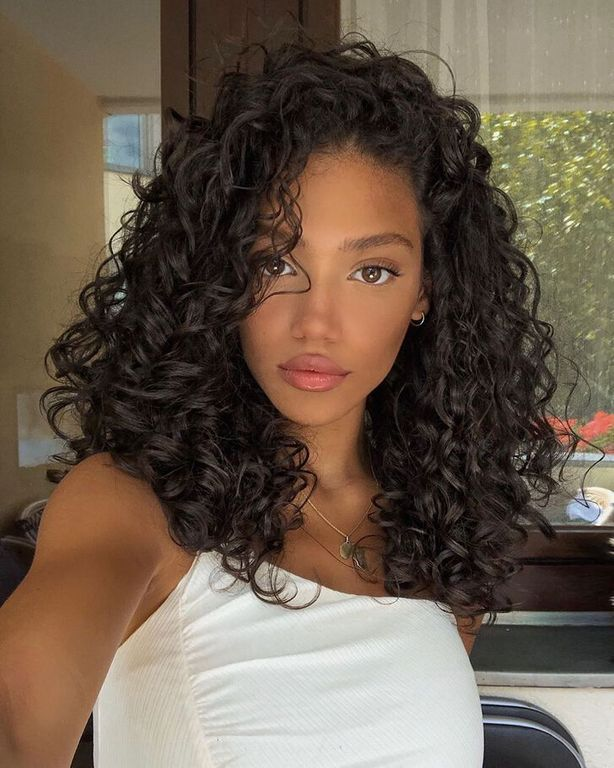

In [8]:
path = r'D:\MLZoomcamp\deep learning - CNN\data\data\train\curly'
name = r'00cbad1ffe22d900018e5a2e7376daed4.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [12]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

The shape for input should be (200, 200, 3)
Next, create a convolutional layer (Conv2D):
Use 32 filters
Kernel size should be (3, 3) (that's the size of the filter)
Use 'relu' as activation
Reduce the size of the feature map with max pooling (MaxPooling2D)
Set the pooling size to (2, 2)
Turn the multi-dimensional result into vectors using a Flatten layer
Next, add a Dense layer with 64 neurons and 'relu' activation
Finally, create the Dense layer with 1 neuron - this will be the output
The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

In [13]:
model = Sequential()

In [14]:
# First Layer: Convolutional Layer
model.add(Conv2D(
    filters=32,                # 32 filters
    kernel_size=(3, 3),        # Kernel size (3, 3)
    activation='relu',         # Activation function: ReLU
    input_shape=(200, 200, 3)  # Input shape: (200, 200, 3)
))

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Second Layer: MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pool size: (2, 2)

In [16]:
# Third Layer: Flatten Layer
model.add(Flatten())  # Converts 2D feature maps into a 1D vector

In [17]:
# Fourth Layer: Fully Connected Dense Layer
model.add(Dense(64, activation='relu'))  # Dense layer with 64 neurons and ReLU activation

In [18]:
# Output Layer: Fully Connected Dense Layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

In [19]:
# Optimizer
optimizer = SGD(learning_rate=0.002, momentum=0.8)

In [20]:
# Compile the Model
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']         # Metric to track
)


## Question 2
What's the total number of parameters of the model? You can use the summary method for that.

In [21]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

## Question 3  What is the median of training accuracy for all the epochs for this model?

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    r'D:\MLZoomcamp\deep learning - CNN\data\data\train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [27]:
test_generator = test_datagen.flow_from_directory(
    r'D:\MLZoomcamp\deep learning - CNN\data\data\test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [28]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 548ms/step - accuracy: 0.5904 - loss: 0.7358 - val_accuracy: 0.5920 - val_loss: 0.6587
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.6901 - loss: 0.5804 - val_accuracy: 0.6517 - val_loss: 0.6161
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 305ms/step - accuracy: 0.7218 - loss: 0.5538 - val_accuracy: 0.6667 - val_loss: 0.6209
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 340ms/step - accuracy: 0.7414 - loss: 0.5299 - val_accuracy: 0.6617 - val_loss: 0.5990
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.7456 - loss: 0.5154 - val_accuracy: 0.6866 - val_loss: 0.5761
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 360ms/step - accuracy: 0.7578 - loss: 0.4815 - val_accuracy: 0.6915 - val_loss: 0.5700
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 300ms/step - accuracy: 0.7868 - loss: 0.4348 - val_accuracy: 0.6915 - val_loss: 0.5962
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 306ms/step - accuracy: 0.7896 - loss: 0.4374 - val_accuracy: 0.686

In [29]:
training_accuracy = history.history['accuracy']
median_accuracy = np.median(training_accuracy)
print('Median Training Accuracy:', median_accuracy)

Median Training Accuracy: 0.7712500095367432


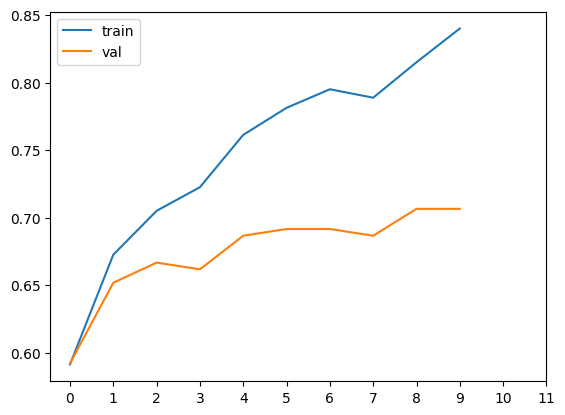

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(12))
plt.legend()

## Question 4 What is the standard deviation of training loss for all the epochs for this model?

In [32]:
training_loss = history.history['loss']
std_loss = np.std(training_loss)
print('Standard Deviation of Training Loss:', std_loss)

Standard Deviation of Training Loss: 0.09479159323655463


## Question 5 Let's train our model for 10 more epochs using the same code as previously.
Data Augmentation
For the next questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

rotation_range=50,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest'

In [33]:
# Augmented Data Generator
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [34]:
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    r'D:\MLZoomcamp\deep learning - CNN\data\data\train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [35]:
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10


c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 539ms/step - accuracy: 0.6813 - loss: 0.6200 - val_accuracy: 0.6866 - val_loss: 0.5804
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 538ms/step - accuracy: 0.6799 - loss: 0.5790 - val_accuracy: 0.6915 - val_loss: 0.5951
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.7008 - loss: 0.5513 - val_accuracy: 0.6368 - val_loss: 0.6624
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.6204 - loss: 0.6278 - val_accuracy: 0.6915 - val_loss: 0.5941
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.7342 - loss: 0.5616 - val_accuracy: 0.7114 - val_loss: 0.5325
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 445ms/step - accuracy: 0.7276 - loss: 0.5360 - val_accuracy: 0.6418 - val_loss: 0.6547
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 450ms/step - accuracy: 0.7193 - loss: 0.5526 - val_accuracy: 0.6766 - val_loss: 0.6048
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 505ms/step - accuracy: 0.7238 - loss: 0.5287 - val_accuracy: 0.756

In [36]:
# Question 5: Mean Test Loss
mean_test_loss = np.mean(history_augmented.history['val_loss'])
print('Mean Test Loss:', mean_test_loss)

Mean Test Loss: 0.5780778348445892


## Question 6 What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [37]:
last_5_epochs_accuracy = history_augmented.history['val_accuracy'][5:]
avg_accuracy = np.mean(last_5_epochs_accuracy)
print('Average Test Accuracy (Epochs 6-10):', avg_accuracy)

Average Test Accuracy (Epochs 6-10): 0.7184079647064209
